# Week 3, Day 2A: Time Complexity

![Reminder to Save](https://github.com/jamcoders/jamcoders-public-2025/blob/main/images/warning.png?raw=True)

In [ ]:
# Always run this code.
%config InteractiveShell.ast_node_interactivity="none"
import sys
if 'google.colab' in sys.modules:
  !pip install --force-reinstall git+https://github.com/jamcoders/jamcoders-public-2025.git --quiet
  !pip install sympy
  !pip install numpy
import sympy
from sympy import Symbol, Function, log, sympify
from jamcoders.base_utils import *
from jamcoders.week3.labw3d2a import *


Over the past couple of weeks, we've written several functions that perform various tasks. These functions or procedures are called **algorithms**. For any algorithm that you will write, you should hope to have the following guarantees:
* **Correctness**: The algorithm should fulfill its intended purpose
* **Efficiency**: The algorithm should be *fast* and use as little memory as possible

When we start to reason about the speed (or running time) of our algorithm, we are analyzing **time complexity**. This lab should help you to become more comfortable with this concept.

# Table of Contents  

**[Question 0: Binary Search & Logarithms Review](#0)**

**[Question 1: Big-O Notation - Expressions](#1)**

**[Question 2: Big-O Notation - Code](#2)**

**[Question 3: Selection Sort Runtime](#3)**

**[Question 4: $O(n^2)$ vs $O(n \log (n))$](#4)**

**[Question 5: $\log(n^2)$](#5)**

**[Question 6: Binary Search and Cake Order Hackers](#6)**

**[Question 7: Runtime Challenges](#7)**

<a name="0"></a>
## Question 0: Binary Search & Logarithms Review

Fill in the blanks so that the following function `binary_search_index`, which takes as input a _sorted_ list of integers `lst` and a target integer `target`, returns the index of the element we are looking for, or determines that it does not exist in `lst` and returns `-1`.

In [ ]:
def binary_search_index(lst, target):
    """
    Finds the index of the target in sorted lst, if found. Else -1

    Args:
        lst (list(int)):
            Sorted list of ints
        target (int):
            Number we'd like to find
    Returns (int):
        Index of target, if target is in list. Otherwise, -1.
    """

    left = 0
    right = len(lst) - 1

    while left <= right:
        mid = # Your code here
        if lst[mid] == target:
            return mid
        elif lst[mid] < target:
            # Your code here
        else:
            # Your code here
    return -1


# Test your code with the following, it should return 3.
print(binary_search_index([12, 14, 25, 47, 58, 69, 72, 83, 94, 105], 47))

### 0.0 Logarithms Rule!

Logarithms are the opposite (inverse) of exponents. For any two numbers $a > 0$ and $z$, the base-$a$ logarithm of $z$ is a number $x$ such that $$a^x = z.$$
Just like with exponents, we have mathematical notation to denote the logarithm: $x=\log_{a}(z)$.

Some examples:

* Since $2^{5} = 32$ then $\log_2(32) = 5$.
* Since $2^{0} = 1$ then $\log_2(1) = 0$. Actually, for _any_ number $a \neq 0$ it holds that $\log_a(1) = 0$...

In other words, the logarithm of $x$ base $a$, is _the number of times we need to multiply $a$ by itself to equal_ $x$.

Also recall that we have the following rules.

1. $$ \log_a(x \cdot y) = \log_a(x) + \log_a(y)$$
2. $$ \log_a(x^y) = y \cdot \log_a(x)$$

<br>
Let's test our understanding of logarithms. Write your answers to the following questions in the below code cell.

1. $\log_{4}(16)$ = ?
2. $\log_{2}(8)$ = ?
3. $\log_{6}(6)$ = ?

In [ ]:
answer1 = # YOUR ANSWER HERE
answer2 = # YOUR ANSWER HERE
answer3 = # YOUR ANSWER HERE

assert_equal(answer1 + answer2 + answer3, 6)
assert_equal(answer1 - answer2 + answer3, 0)

### 0.1 Visualizing logarithms

Take a minute to confirm that the following statements are true:

- $\log_{2}(1)$ = 0
- $\log_{2}(2)$ = 1
- $\log_{2}(4)$ = 2
- $\log_{2}(8)$ = 3

Now, we're going to plot the log base-2 graph! Our plot is $y = \log_{2}(x)$.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Binary_logarithm_plot_with_ticks.svg/600px-Binary_logarithm_plot_with_ticks.svg.png" height = 400px>

Notice that you can see the points (1, 0), (2, 1), (4, 2), and (8, 3) on the graph.

Also important to notice is the general trend of the logarithm graph. As x increases, the graph starts to flatten out!!

How does this compare to the graph of $y = x$? Type your answer as a comment in the code cell below.

In [ ]:
# YOUR ANSWER HERE

<a name="1"></a>
## Question 1: Big-O Notation - Expressions



When we are analyzing the time complexity of an algorithm, we care about **how the running time depends on the size of the input**. In the examples that follow, we'll typically let $n$ represent the input size and let $t(n)$ represent the running time.


#### Big-O notation
Big-O notation is a way to describe how long an algorithm takes to run as the input size grows. It helps us compare different algorithms with respect to their execution time. Suppose we know that a few lines of code take time $t(n)$ to be executed, and we want to find the order of $t(n)$ in Big-O notation.

At a high level, the goal is to simplify the expression as much as possible without changing its asymptotic growth rate; towards this end, we ignore smaller details and constant factors in favor of the main growth pattern.

To simplify the expression, repeatedly perform any of the following operations in any order:

1. Regular arithmetic manipulations, such as
    - $(3n+1)(n + 2) = 3n^2 + 7n + 2$,
    - $\log_a(x^y) = y \cdot \log_a(x)$, and
    - $\log_a(x \cdot y) = \log_a(x)  + \log_a(y)$.

2. Replace multiplicative or additive constants (i.e., a number that is not a variable, and is not in an exponent), with the number 1. For example, $3n^2 + 7n + 2 ~\rightsquigarrow~ n^2 + n + 1$. (The arrow '$\rightsquigarrow$' denotes that the expression on the right is a simplified approximation of the expression on the left.)

3. If there is a sum in which one of the terms is strictly smaller than any of the others, simply delete the smaller term. For this matter, assume that variables like $n$ are as large as we like, and in particular larger than any constant. For example, we can simplify $2\log(n) + 1000 ~\rightsquigarrow~ 2\log(n)$, because $2\log(n) > 1000$ for $n$ large enough. Generally, we have the following inequalities for $n$ large enough:
$$
  ~
  \\
  ~
\operatorname{const} < \operatorname{const}\cdot\log(n)  < \operatorname{const}\cdot n < \operatorname{const}\cdot n \log (n) < \operatorname{const}\cdot n^2 < \operatorname{const}\cdot n^2\log(n) <~ ...,
  ~
  \\
  ~
$$
where '$\operatorname{const}$' can be any constant numbers.

Here is a complete example. We simplify the expression $t(n) = (n+3)^2 + 4(n + \log(5n^3))$. The numbers above the arrows indicate which of the operations 1 to 3 we used in each step:

$$
  ~
  \\
  ~
  t(n) = (n+3)^2 + 4(n + \log(5n^3))
  \\
  ~
  \\
  ~~~~~\stackrel{(2)}{\rightsquigarrow}~
  (n+1)^2 + (n + \log(n^3))
  \\
  ~
  \\
  ~~\stackrel{(1)}{\rightsquigarrow}~
  n^2 + 3n + 3\log(n) + 1
    \\
  ~
  \\
  ~~\stackrel{(2)}{\rightsquigarrow}~
  n^2 + n + \log(n) + 1
   \\
  ~
  \\
  ~\stackrel{(3)}{\rightsquigarrow}~
  n^2.
  \\
$$

Conclusion: $t(n) = O(n^2)$.


Once we know the Big-O order of the runtime, we have a pretty good idea of how fast the program will run for large inputs:

Common Big-O orders include:
* $O(1)$: Constant time (doesn't change with input size)
* $O(\log n)$: Logarithmic time (grows very slowly)
* $O(n)$: Linear time (grows directly with input size)
* $O(n \log(n))$: Slightly faster than linear
* $O(n²)$: Quadratic time (grows with square of input size)
* $O(2ⁿ)$: Exponential time (grows very quickly)
* $O(n!)$: Factorial time (grows faster than exponential)

Remember, the slower the Big-O runtime of an algorithm, the faster the algorithm will run. This means that $O(1)$ and $O(\log n)$ algorithms are quite fast; in fact, they are _sub-linear_ because they run faster than linear, or $O(n)$, time.

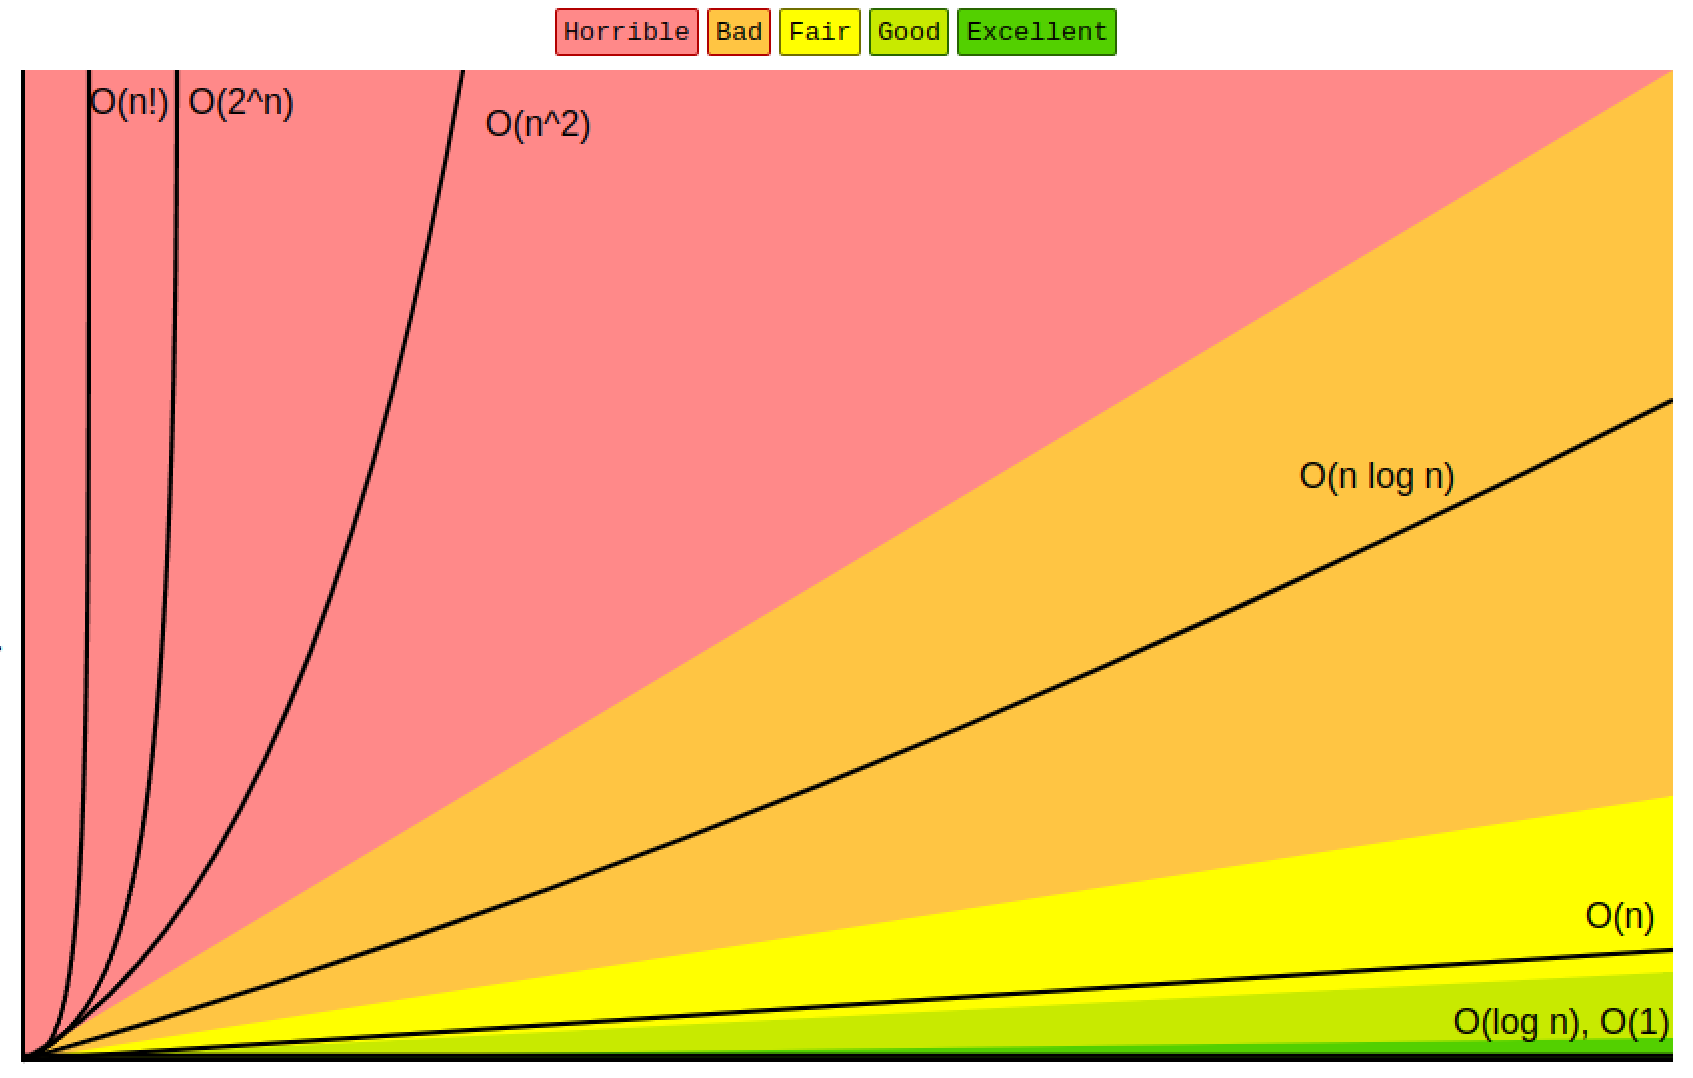

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$<sub><sup>Image source: [bigocheatsheet.com](https://www.bigocheatsheet.com/)<sup><sub>

Now, let's try doing this ourselves! For each of the expressions below, provide the Big-O order.

As a helpful reminder, the Python operation for exponentiation (^) is `**`. For example, $x^4$ can be written in Python as `x**4`.

### 1.0
$t(n) = 2 n + 6n \log(n) + 5$

In [ ]:
n = Symbol('n')
O = Function('O')

t = 2*n + 6*n*log(n) + 5
answer = # YOUR ANSWER HERE

check_answer1_0(answer)

### 1.1
$t(n) = 10000$

In [ ]:
n = Symbol('n')
O = Function('O')

t = 1000
answer = # YOUR ANSWER HERE

check_answer1_1(answer)

### 1.2
$t(n) = 3n + 4$

In [ ]:
n = Symbol('n')
O = Function('O')

t = 3*n + 4
answer = # YOUR ANSWER HERE

check_answer1_2(answer)

### 1.3
$t(n) = 7n^2 + 100 n $

In [ ]:
n = Symbol('n')
O = Function('O')

t = 7*n**2 + 100*n
answer = # YOUR ANSWER HERE

check_answer1_3(answer)

### 1.4
$t(n) = 13n + 12 n \log(n)$

In [ ]:
n = Symbol('n')
O = Function('O')

t = 13*n + 12*n*log(n)
answer = # YOUR ANSWER HERE

check_answer1_4(answer)

### 1.5
$t(n) = 6n^3 + 13n^3 \log(n) + 8 n^2 + 9 n + 10000$

In [ ]:
n = Symbol('n')
O = Function('O')

t = 6*n**3 + (13*n**3)*log(n) + 8*n**2 + 9*n + 10000
answer = # YOUR ANSWER HERE

check_answer1_5(answer)

### 1.6
$t(n) = 1 + 2 + 3 + \dots + n $

*This problem might be more difficult than the others. Don't be afraid to ask for help!*

Hint: What is the closed form representation of $1+2+3+\dots+n$?

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer1_6(answer)

### 1.7
$t(n) = n^2 +  (\log n)^2$

In [ ]:
n = Symbol('n')
O = Function('O')

t = n**2 + (log(n))**2
answer = # YOUR ANSWER HERE

check_answer1_7(answer)

1.8
$t(n) = n/100 +  (\log (n^{100}))^{100}$

*This problem might be more difficult than the others. Don't be afraid to ask for help!*

In [ ]:
n = Symbol('n')
O = Function('O')

t = n/100 + (log(n**(100)))**(100)
answer = # YOUR ANSWER HERE

check_answer1_8(answer)

<a name="2"></a>
## Question 2: Big-O Notation - Code



In this problem, you will see several pieces of code that will depend on the variables `n`. For each snippet, give  the *running time* using **big-O notation**. Please simplify your answer as much as possible.

(*You can assume that any line containing math operations and assignment of variables takes 1 unit of time*.)

In general, to analyze the runtime of a snippet of code, look at the following:
* Any line containing basic operations (arithmetic, assignment, comparisons) takes 1 unit of time.
* Any line containing a for loop executes its  body for as many iterations of the loop.

Then, write out the runtime expression in terms of the input size `n`. Finally, simplify the expression using the guidelines in the previous problem.

#### Example
```python
b = 0                       # 1 unit

for i in range(n):          # Steps below are repeated n times
    b += 1                      # 1 unit
    b *= 2                      # 1 unit
    b %= 100                    # 1 unit
```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = O(n)

check_answer2_0(answer)

Here's why we said our answer is $O(n)$.
 * The first line of code is just assigning variables, which takes constant time, which is $O(1)$.
 * In each iteration of the loop we are updating the variable `b` using basic math operations, which takes time $O(1)$. There are $n$ iterations, so the loop takes a total time of $n \times O(1) = O(n)$.

Putting it all together, the code takes time $O(1) + O(n) = O(n+1) = O(n)$.

### 2.1
```python
a = 0
b = 10
a = b + 5
b += 10
```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_1(answer)

### 2.2
```python
a = 0

for i in range(n):
    a = a / 2
    a = a * 3
    a = a % 100
```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_2(answer)

### 2.3

```python
b = 0

for i in range(n // 2):
    if i % 2 == 0:
        b = b + 2
    else:
        b = b * 5
    b = b % 1000

```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_3(answer)

### 2.4
```python
c = 0

for i in range(n):
    for j in range(n // 2):
        c += (i * j)

for i in range(n):
    c += i

```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_4(answer)

### 2.5
```python
b = 0

for i in range(n):
    for j in range(n):
        for k in range(n):
            b = (2 + j) % k
```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_5(answer)

### 2.6
```python
d = 0
c = 2

for i in range(n):
    for j in range(i):
        d += 1
        c = 3
```

*This problem might be more difficult than the others. Don't be afraid to ask for help!*

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_6(answer)

### 2.7
```python
x = n
while x > 1:
    a = 2
    b = a + 2
    
    x //= 2
```

*This problem might be more difficult than the others. Don't be afraid to ask for help!*

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_7(answer)

### 2.8
```python
a = 12
b = 13

for i in range(n):
    for j in range(100):
        a = b + 5
        b = 10
    
    for i in range(int(log(n))):
        a += 2
```

*This problem might be more difficult than the others. Don't be afraid to ask for help!*

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer2_8(answer)

<a name="3"></a>
## Question 3: Selection Sort Runtime



As we saw in lecture, for selection sort, we sort a list by repeatedly finding its smallest element.

In our recursive implementation, we do so with the following functions:

```python
# Returns the index of the minimum element of the list
def find_min_index(L):
    if len(L) == 0:
        return -1
    
    smallest = L[0]
    smallest_idx = 0
    for i in range(1,len(L)):
        num = L[i]
        if num < smallest:
            smallest = num
            smallest_idx = i
    return smallest_idx
    
# Sorts a list from smallest to largest using selection sort
def selection_sort(L):
    if len(L) == 0:
        return L
    else:
        idx = find_min_index(L)
        return [L[idx]] + selection_sort(L[:idx] + L[idx+1:])
```


### 3.1

What is the time complexity of `find_min_index`?

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer3_1(answer)

### 3.2

Why can't we use binary search to find the minimum index? Answer as a comment in the code cell below.

In [ ]:
# YOUR ANSWER HERE

### 3.3

What is the time complexity of the recursive implementation of selection_sort?

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer3_3(answer)

<a name="4"></a>
## Question 4: $O(n^2)$ vs $O(n \log (n))$
Lydia and Zaria were asked to write a function that sorts a list of items.
Lydia wrote a function with a running time of $O(n^2)$.
Zaria, on the other hand, wrote a function with a running time of $O(n \log (n))$.
 In both cases, $n$ denotes the length of the list.

### 4.1
Whose code has the better running time, in terms of Big-O? Enter your answer as a string.

In [ ]:
ta = # YOUR ANSWER HERE

### 4.2
It turns out that the running time of Lydia's function is $t(n) = 0.0001 n^2$ and the running time of Zaria's function is $t(n) = 10 n \log (n)$. Give a value of $n$ that will make Lydia's function run faster than Zaria's. Assume Zaria's $\log$ is base $2$.

In [ ]:
n = # YOUR ANSWER HERE

In [ ]:
check_answer4(ta, n)

<a name="5"></a>
## Question 5: $\log(n^2)$



Manolis and Lydia are having a discussion about the Big-Oh notation

### 5.1
Consider the function $t(n) = \log(n^2)$.
Manolis is telling Lydia "What are you thinking biggo? It's obvious that $t(n)$ is biggo of $\log n$ (i.e. $t(n) = O (\log n)$)". Is Manolis correct? *Write your answer as a comment*.

In [ ]:
# YOUR ANSWER HERE

### 5.2

Lydia says she can answer Question 5.1 **without** using rule 3 (from the simplification rules mentioned in Question 1). What explanation could she give? *Write your answer as a comment*.

In [ ]:
# YOUR ANSWER HERE

### 5.3
Consider the function $t(n) = \log (n^n)$.
Now, Manolis is trying to convince Lydia that $t(n) = O(\log n)$. Is Manolis correct? Explain your answer **without** using rule 3. *Write your answer as a comment*.

In [ ]:
# YOUR ANSWER HERE

<a name="7"></a>
## Question 7 (Optional): Runtime Challenges

Can you compute the runtime of the following programs?

These are **very** challenging questions, don't be afraid to ask for help!


### 7.1

```python
x = n
out = 0

while x != 1:
    for i in range(x):
        out += 1
    x //= 2
```


In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer7_1(answer)

### 7.2
```python
def f(lst): # lst is a list with length n!
    if len(lst) <= 1:
        return 2
    return f(lst[:-1]) + f(lst[1:])
```

In [ ]:
n = Symbol('n')
O = Function('O')

answer = # YOUR ANSWER HERE

check_answer7_2(answer)